<a href="https://colab.research.google.com/github/rojre1979/AI_References_2022/blob/main/SP902_Text_Capstone_(Robert_Judal_Regalado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.text.all import *
import pandas as pd

In [6]:
text_df = pd.read_csv("/content/sample_data/SP902-Text-Capstone.csv", encoding='latin1')

In [10]:
text_df.columns = ['label','title', 'description']

In [13]:
text_df['label'] = text_df['label'].astype(str)

In [16]:
text_df.dtypes

label          object
title          object
description    object
dtype: object

In [12]:
dls = TextDataLoaders.from_df(text_df, 
                                 text_col = 'description', 
                                 label_col = 'label', 
                                 valid_pct = 0.20, 
                                 bs = 64,)

In [17]:
dls = TextDataLoaders.from_df(text_df, 
                                 text_col = 'description', 
                                 label_col = 'label', 
                                 valid_pct = 0.20, 
                                 bs = 64,)

In [18]:
dls.show_batch()

,text,category
0,"xxbos 4 xxmaj miami at xxup n.c . xxmaj state < xxunk p.m. , xxup espn < / em><br > think the xxmaj wolfpack is kicking itself for that loss two weeks ago at xxmaj north xxmaj carolina ? xxmaj you bet . xxmaj had xxup n.c . xxmaj state ( 4 - 2 , 3 - 1 xxup acc ) won that one , this would be for sole possession of first place in the xxup acc . xxmaj as it is , this is a chance for the xxmaj wolfpack to show it belongs in the upper echelon of the restructured league -- which , for now , is xxmaj miami , xxmaj florida xxmaj state , and a xxunk of also - rans . xxmaj the xxmaj wolfpack 's defense is the best in the nation against the pass ( xxunk yards per game ) and overall",2
1,"xxbos \ "" now that the country is awash in xxmaj reagan nostalgia , some observers are predicting \ that you will enter politics . xxmaj would you like to be president of the xxmaj united \ xxmaj states ? "" \ "" i would be xxunk . xxmaj i 'm an xxunk . xxmaj as we all know , that is something \ people wo n't accept . "" \ "" what would you do if xxmaj senator xxmaj kerry asked you to be his vice president ? "" \ "" i would question his sanity . "" \ "" do you ever go to church ? "" \ "" no . i visit my wife 's xxunk . "" \ "" so you sometimes practice xxmaj xxunk ? "" \ "" i do n't claim anything . xxmaj but my xxunk would be in that direction . i",4
2,xxbos xxmaj following is the xxmaj globe xxmaj top 20 in emass for girls ' soccer . xxmaj no . xxmaj team xxmaj record xxmaj last 1 . xxmaj belmont 14 - 0 - 1 1 2 . xxmaj oliver xxmaj ames 13 - 1 - 0 2 3 . xxmaj lynnfield 15 - 0 - 0 3 4 . xxmaj norwell 15 - 0 - 0 5 5 . xxmaj andover 14 - 1 - 0 4 6 . xxmaj bishop xxmaj feehan 11 - 1 - 1 6 7 . xxmaj old xxmaj rochester 14 - 1 - 1 7 8 . xxmaj marshfield 10 - 1 - 4 9 9 . xxmaj wellesley 9 - 0 - 5 8 10 . xxmaj weymouth 12 - 1 - 2 10 11 . xxmaj rockland …,2
3,"xxbos xxmaj forbes.com - xxmaj walk into the xxmaj urban xxmaj outfitters in xxmaj manhattan 's xxmaj west xxmaj village and you 're tempted to sit down on one of the white vinyl benches near the entrance . xxmaj from there you can admire the antique xxunk with mirrored front , along with champagne xxunk , xxunk shakers and small xxunk xxmaj christmas trees . xxmaj there are plenty of casual clothes for young women and men ( target age : 18 - 30 ) , as well as accessories , furniture , books , gifts , makeup and soaps . xxmaj if you want shoes , you have to go to the back of the store near the registers , where the display is xxunk arranged to resemble a woman 's dressing room .",3
4,"xxbos xxmaj the most pervasive problem in running xxup it is not a specific technology issue at all . xxmaj its dealing with bad vendors . xxmaj even if you have been able to reduce your xxup it operation down to a pure open source environment on the software side , hardware still must be purchased through commercial channels . xxmaj in the post - boom xxup it age , the power has supposedly shifted from vendor to buyer , but xxup it managers continue to be manipulated by vendors who do nt always act in the customers best interest . xxmaj to keep vendors in line , xxup it managers need to stay on the ball and punish bad behavior when it occurs by finding new suppliers .",3
5,"xxbos xxmaj dale xxmaj fuller , president and xxup ceo of xxmaj borland , has been with the company since 1 xxrep 3 9 , when it had temporarily been renamed xxmaj xxunk . xxmaj recently , the company has been touting its xxup alm ( application lifecycle management ) strategy and efforts to provide for a unified , manufacturing - like structure for software development projects . infoworld editor - at - large xxmaj paul xxmaj krill spoke with xxmaj fuller at the borcon conference in xxmaj san xxmaj jose , xxmaj calif . , last week about xxmaj borland 's tools and xxup alm strategies and issues such as xxmaj java vs. .net , xxmaj web services , and outsourcing .",4
6,"xxbos xxmaj pro basketball : xxmaj charlotte vs. xxmaj celtics at the 

In [19]:
learn = text_classifier_learner(dls, 
                                AWD_LSTM, 
                                drop_mult=0.5, 
                                metrics=accuracy)

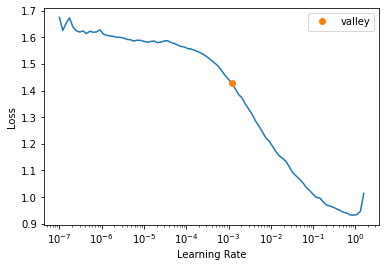

In [20]:
best_learning_rate = learn.lr_find()

In [21]:
learn.fine_tune(4, best_learning_rate[0])

epoch,train_loss,valid_loss,accuracy,time
0,0.525466,0.357867,0.872370,02:28


epoch,train_loss,valid_loss,accuracy,time
0,0.386136,0.279373,0.899787,03:42
1,0.327572,0.252837,0.909205,03:43
2,0.288264,0.243409,0.914121,03:43
3,0.279208,0.241525,0.913621,03:44


In [22]:
learn.show_results()

,text,category,category_
0,"xxbos xxmaj there 's troubling news ( ft subscription xxunk , alternate copy here ) coming from xxmaj japan , where the xxmaj kyoto protocol on xxmaj greenhouse xxmaj emissions was born in 1997 . xxmaj it seems that the xxmaj japanese are n't going to be able to meet their emissions targets specified in the agreement in time . xxmaj indeed , unless they buy a "" large quantity "" of emissions credits from other countries , they 're not going to be able to meet their commitment at all . xxmaj xxunk xxmaj sugiyama , a climate expert at the xxmaj central xxmaj research xxmaj institute of xxmaj electric xxmaj power xxmaj industry in xxmaj japan , said emissions were rising 1 per cent a year due to a larger - than - expected impact from vehicles and households . xxmaj that made it impossible to cut real",4,1
1,"xxbos xxup andover xxmaj coach : xxmaj ken xxmaj xxunk ( ninth year , 37 - 46 - 2 ) . xxmaj last year 's record : 5 - 6 . xxmaj returning starters ( 13 ): xxmaj mike xxmaj xxunk , xxup ot / xxup dt , 6 - 4 , 255 , xxmaj sr . ; xxmaj buddy xxmaj xxunk , xxup wr / xxup s , 6 - 0 , xxunk , xxmaj jr . ; xxmaj john xxmaj fox , xxup wr / xxup db , 5 - 10 , 170 , xxmaj sr . ; xxmaj shaheen xxmaj xxunk , xxup rb / xxup db , 5 - 9 , 177 , xxmaj sr . ; xxmaj mike xxmaj xxunk , g / xxup dt , 6 - 0 , 253 , xxmaj sr . ; xxmaj matt xxmaj xxunk , xxup rb / xxup",2,2
2,xxbos \ \ xxmaj i 've blogged before about how to setup your xxmaj sprint vision phone with their \ xxunk ( which is a perfect word for 1 / 2 of xxmaj sprints product line ) xxmaj vision xxup ip \ services . \ \ xxmaj most recent phones are capable of acting as a xxup usb modem when connected to your \ favorite laptop . \ \ xxmaj there are a few tricks involved and its mostly a black art . xxmaj to that end xxmaj i 'll \ quickly review what s necessary to configure xxmaj linux xxunk with a xxmaj nokia xxunk . \ \ * xxmaj hardware * \ \ xxmaj the first step is to get the right hardware . xxmaj first off do n't start with xxmaj sprint . \ xxmaj they wo n't acknowledge that this is even possible . \ \,4,4
3,"xxbos xxup brighton xxmaj coach : xxmaj james xxmaj philip ( eighth year , 10 - 48 - 2 ) . xxmaj last year 's record : 1 - 8 . xxmaj returning starters ( 5 ): xxmaj donald xxmaj jeffrey , xxup rb - de , 5 - 11 , 190 , xxmaj sr ; xxmaj xxunk jean - bon , xxup db - wr , 5 - 6 , 145 , xxmaj sr . ; xxmaj marvin xxmaj charles , xxup c - lb , 6 - 1 , 200 , xxmaj jr . ; xxmaj jermaine xxmaj bell , xxup rb - lb , 5 - 10 , 185 , xxmaj jr . xxmaj returning letterman : xxmaj xxunk xxmaj bowden , xxup de / xxup te , 6 - 1 , 155 , xxmaj jr . xxmaj strength : xxmaj running game . xxmaj weakness :",2,2
4,"xxbos xxmaj sean xxmaj harrigan was ousted from his post as president of the \ $ 177 billion xxmaj california xxmaj public xxmaj employees ' xxmaj retirement xxmaj system . xxmaj in a 3 to 2 vote in xxmaj san xxmaj francisco , the xxmaj california state xxmaj personnel xxmaj board pulled xxmaj harrigan from xxmaj calpers , where he had served for five years . xxmaj elected as xxmaj calpers board president in xxmaj february 2003 , xxmaj harrigan is a longtime union official and an advocate for corporate governance reform . xxmaj he persuaded institutional investors to withhold votes for xxmaj walt xxmaj disney 's xxmaj michael xxup d. xxmaj eisner as board chairman , and he led a drive to withhold votes for xxmaj safeway chief executive xxmaj steven xxup a. xxmaj xxunk while the union was on strike against the company . xxmaj ron xxmaj xxunk",1,3
5,"xxbos xxmaj when the alarm goes off today for the players at xxmaj boise xxmaj state and xxmaj san xxmaj jose xxmaj state , they 'll yawn , stretch and xxunk something like , "" it must be noon somewhere . "" xxmaj think television is an innocent xxunk in college sports ? xxmaj if so , hit the xxunk button . xxmaj the xxmaj broncos and xxmaj spartans will kick off their xxmaj western xxmaj athletic xxmaj conference t

In [23]:
learn.predict("The town - which sits in the Donetsk region and had a pre-war population of 70,000 - has been the centre of Russian attacks for months.")

('1', tensor(0), tensor([0.9525, 0.0056, 0.0350, 0.0069]))

In [24]:
learn.predict("Bruce Lehrmann: Australia parliament rape trial abandoned over juror 'misconduct")

('1', tensor(0), tensor([0.8740, 0.0066, 0.0508, 0.0686]))

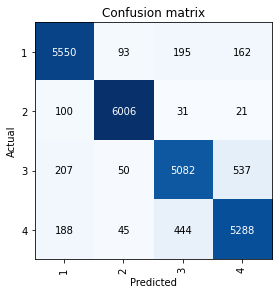

In [25]:
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()

In [26]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

,input,target,predicted,probability,loss
0,"xxbos xxmaj after many years under the rule of the corrupted government there is a new hope for xxmaj ukraine : the new presidential elections . xxmaj among 28 candidates the 2 primary are the opposition candidate xxmaj victor xxmaj yushchenko ( reformer which served as the xxmaj prime xxmaj minister in the past and was allegedly poisoned 1 month before the first tour of the elections ) and the government 's candidate xxmaj victor xxmaj yanukovich ( twice convicted in the past of rape and organized robbery , currently serving as the xxmaj prime xxmaj minister , having strong ties with mafia clans and holding in iron fist authorities across xxmaj ukraine ) .",4,1,0.9972260594367981,9.162460327148438
1,"xxbos xxmaj forbes.com - xxmaj governments react differently to acts of terror . xxmaj president xxmaj bush took the war against terror on the offensive , to xxmaj afghanistan and xxmaj iraq . xxmaj in xxmaj spain , the newly elected government chose to react to the xxmaj madrid train bombings with xxunk , withdrawing xxmaj spanish troops from xxmaj iraq . xxmaj in xxmaj russia , xxmaj president xxmaj vladimir xxmaj putin has reacted to the xxmaj beslan school massacre by taking yet another step in xxunk political power in the xxmaj kremlin . …",3,1,0.9997443556785583,8.277745246887207
2,"xxbos xxmaj russia said xxmaj thursday that xxmaj china xxmaj petroleum & xxmaj chemical xxmaj corp . , xxmaj asia 's biggest oil refiner , may join xxmaj royal xxmaj dutch / xxmaj shell xxmaj group 's xxmaj xxunk project in the xxmaj pacific and buy liquefied natural gas from the venture 's offshore fields .",4,3,0.9739491939544678,7.890369892120361
3,xxbos xxup ankara - xxmaj turkish xxmaj prime xxmaj minister xxmaj recep xxmaj tayyip xxmaj erdogan expressed belief on xxmaj saturday that xxmaj turkey 's contributions to world peace and stability would increase if it became a non - permanent member of the xxmaj united xxmaj nations ( un ) xxmaj security xxmaj council .,3,1,0.9994705319404602,7.785283088684082
4,"xxbos xxup ap - xxmaj samuel xxmaj xxunk hears of the unrest in his homeland from storms and political violence , and feels so helpless . xxmaj he has donated generous sums to assist relief efforts in xxmaj haiti , but he has no peace of mind .",2,1,0.9977995753288269,7.644076824188232
5,"xxbos all - star shortstop xxmaj edgar xxmaj renteria told xxmaj the xxmaj boston xxmaj globe he has agreed to a \ $ 40 million , four - year contract with the xxmaj red xxmaj sox , the paper reported on its xxmaj web site xxmaj wednesday .",1,2,0.9870237112045288,7.6325602531433105
6,"xxbos xxmaj on xxmaj tuesday , millions of xxmaj americans will decide whether xxmaj george xxup w. xxmaj bush or xxmaj john xxup f. xxmaj kerry will be president of the xxmaj united xxmaj states for the next four years .",2,2,0.5986385941505432,7.565502643585205
7,"xxbos xxmaj the gloomy day provided a fitting setting for the xxmaj longhorns , who lost because of a dismal offense and their inability to stop the freshman tailback xxmaj adrian xxmaj peterson .",1,2,0.5986385941505432,7.2442426681518555
8,"xxbos dreamworks , which created box office smash xxmaj shrek , raises \ $ 812 m from its flotation on the xxmaj new xxmaj york xxmaj stock xxmaj exchange .",1,2,0.5986385941505432,7.152069091796875
